<a href="https://colab.research.google.com/github/dgbaenar/deep-learning-with-tensorflow/blob/main/Learning_Tensorflow_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Capítulo 1

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.Variable(0.)

In [ ]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [ ]:
with tf.GradientTape() as tape:
  y = 2 * x + 3

In [ ]:
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))

In [ ]:
with tf.GradientTape() as tape:
  y = 2 * x + 3

In [ ]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.13525951, 0.2729926 ],
       [0.2982719 , 0.6956613 ]], dtype=float32)>

In [ ]:
2 * x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.27051902, 0.5459852 ],
       [0.5965438 , 1.3913226 ]], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.270519 , 3.5459852],
       [3.5965438, 4.3913226]], dtype=float32)>

In [ ]:
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

# 2. Capítulo 2

In [ ]:
input_var = tf.Variable(initial_value=3.) 
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  
gradient = tape.gradient(result, input_var)

In [ ]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## 2.1 A linear classifier in pure TensorFlow

Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane (see figure 3.6). We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.

In [10]:
import numpy as np
import tensorflow as tf

In [11]:
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(   
    mean=[0, 3],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class)
                    
positive_samples = np.random.multivariate_normal(   
    mean=[3, 0],                                    
    cov=[[1, 0.5],[0.5, 1]],                        
    size=num_samples_per_class)    

In [12]:
negative_samples

array([[-0.32918925,  3.06620332],
       [ 1.29922645,  3.41655776],
       [-0.45416012,  1.39275667],
       ...,
       [-0.32892627,  3.53356598],
       [-0.29966525,  2.94312979],
       [ 1.01570102,  2.30390098]])

In [13]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [14]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

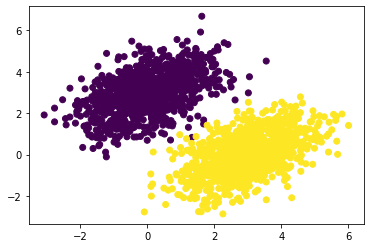

In [15]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()